In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,Market,Category,Region,Year,Customer Name,Total sales,Country,City,State,Customer ID,...,Order Date,Sub-Category,Product ID,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost
0,Africa,Furniture,Central Africa,2012,Henia Zydlo,2478.60,Angola,Benguela,Benguela,HZ-49504,...,2012-01-08,Bookcases,FUR-BO-4850,2012-01-13,Standard Class,2478.60,6,0.0,49.50,349.87
1,Africa,Furniture,Central Africa,2012,Ionia McGrath,1958.10,Republic of the Congo,Loubomo,Niari,IM-5055106,...,2012-11-11,Bookcases,FUR-BO-3625,2012-11-15,Standard Class,1660.80,4,0.0,83.04,244.07
2,Africa,Furniture,Central Africa,2012,Ionia McGrath,1958.10,Republic of the Congo,Loubomo,Niari,IM-5055106,...,2012-11-11,Bookcases,FUR-BO-5954,2012-11-15,Standard Class,297.30,2,0.0,59.46,24.59
3,Africa,Furniture,Central Africa,2012,Lori Olson,506.04,Cameroon,Yaounde,Centre,LO-717022,...,2012-12-30,Bookcases,FUR-BO-3629,2013-01-04,Standard Class,506.04,4,0.0,212.52,28.40
4,Africa,Furniture,Central Africa,2012,Clay Ludtke,195.72,Cameroon,Yaounde,Centre,CL-256522,...,2012-06-19,Furnishings,FUR-FU-3952,2012-06-19,Same Day,195.72,4,0.0,27.36,26.73


In [4]:
'''
    Question-1 : From the data find out for each subcategory of products for each Region on a yearly Basis:
        1. Profit as % of Sales – Profit Margin
        2. Shipping cost as % of Sales – Shipment cost% 
'''
profit_margin = data['Profit'].values/data['Sales'].values
shipment_cost = data['Shipping Cost'].values/data['Sales'].values

In [5]:
data['shipment_cost_per'] = shipment_cost
data['profit_margin'] = profit_margin

In [6]:
table = pd.pivot_table(data, columns=['Year'], values=['Sales', 'Profit', 'Shipping Cost', 'profit_margin', 'shipment_cost_per'], 
                       index=['Region', 'Sub-Category'], aggfunc={
                           'Sales' : np.mean,
                           'Profit' : np.mean,
                           'Shipping Cost' : np.mean,
                           'profit_margin' : np.mean,
                           'shipment_cost_per' : np.mean
                       })

In [7]:
table.head()

Profit                                      \
Year                      2012        2013        2014        2015   
Region Sub-Category                                                  
Canada Accessories    10.42000   13.910000   65.360000  140.802857   
       Appliances    400.86000  414.900000   70.122000   73.185000   
       Art            12.60000   26.193000   18.814286   13.941818   
       Binders        16.37625   11.544545   21.292500    5.680000   
       Bookcases           NaN   27.780000  118.485000   90.135000   

                          Sales                                       \
Year                       2012         2013        2014        2015   
Region Sub-Category                                                    
Canada Accessories     83.07000    82.600000  194.890000  390.625714   
       Appliances    1083.54000  1136.490000  329.406000  367.365000   
       Art             50.92000    96.813000  107.202857   62.642727   
       Binders         64.75875    60.253636   78.266250   21.780000   
       Bookcases            NaN   230.640000  327.540000  719.130000   

                    Shipping Cost                                    \
Year                         2012        2013       2014       2015   
Region Sub-Category                                                   
Canada Accessories       17.76000   11.820000  24.283333  28.542857   
       Appliances        76.32000  146.046667  36.788000  50.390000   
       Art                9.32500   10.062000  15.172857   6.322727   
       Binders            6.74875    5.027273   5.678750   4.386667   
       Bookcases              NaN   20.330000  37.345000  41.880000   

                    profit_margin                                \
Year                         2012      2013      2014      2015   
Region Sub-Category                                               
Canada Accessories       0.139619  0.239603  0.273222  0.261328   
       Appliances        0.369954  0.363317  0.219938  0.169988   
       Art               0.232830  0.250601  0.206334  0.241284   
       Binders           0.227120  0.249222  0.276561  0.267919   
       Bookcases              NaN  0.139860  0.339888  0.192451   

                    shipment_cost_per                                
Year                             2012      2013      2014      2015  
Region Sub-Category                                                  
Canada Accessories           0.208342  0.139418  0.167664  0.075978  
       Appliances            0.070436  0.118674  0.123299  0.161470  
       Art                   0.131975  0.122680  0.121035  0.105170  
       Binders               0.110833  0.112688  0.135500  0.265733  
       Bookcases                  NaN  0.095985  0.114661  0.106688

In [8]:
'''
    B. Calculate the following from the resultant output of A:
        1. Does Shipping cost affect Profit ? 
        Draw yearly profit Margin trend (graph) for all line items where Shipment cost% is >10%
        Draw yearly profit Margin trend (graph) for all line items where Shipment cost% is < 10%
'''
unique_items = list(data['Sub-Category'].unique())
unique_year = list(data['Year'].unique())

In [9]:
'''
    Individuale graph for Shipment cost% is >10%
'''
margin_trend = {}
for year in unique_year:
    for item in unique_items:
        temp_data = data[data['Year']==year]
        temp_data = temp_data[temp_data['shipment_cost_per']>0.10]
        if item in margin_trend:
            margin_trend[item].append(np.mean(temp_data[temp_data['Sub-Category'] ==item]['profit_margin'].values))
        else:
            margin_trend[item] = []
            margin_trend[item].append(np.mean(temp_data[temp_data['Sub-Category'] ==item]['profit_margin'].values))
            

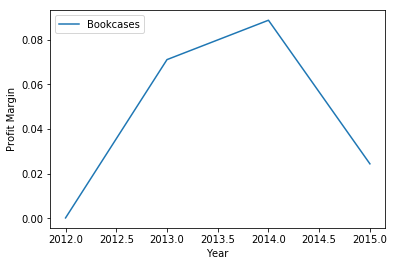

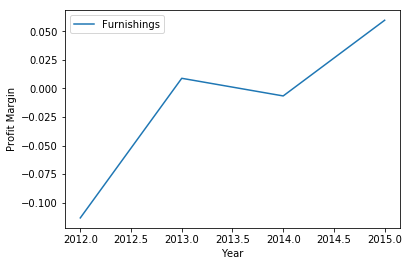

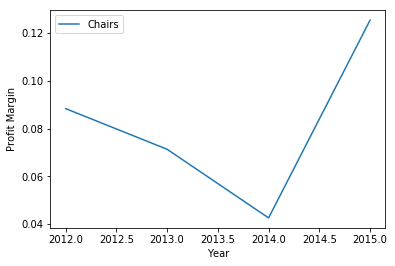

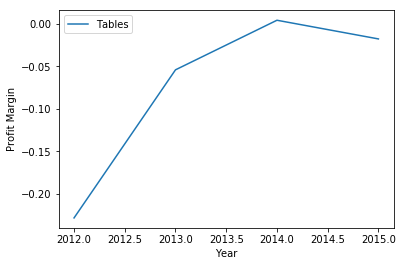

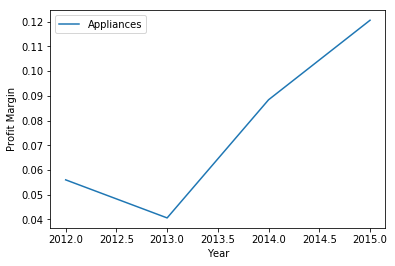

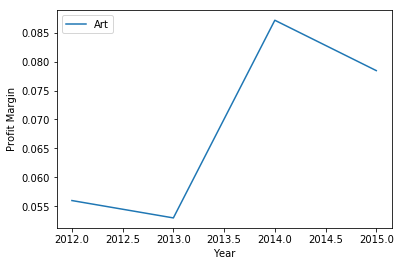

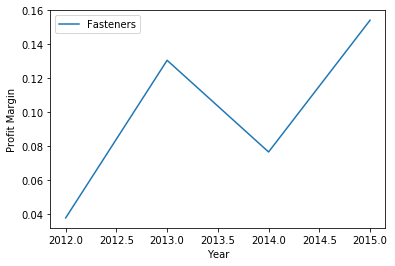

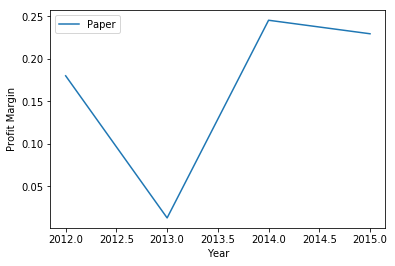

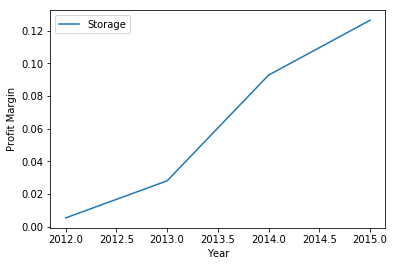

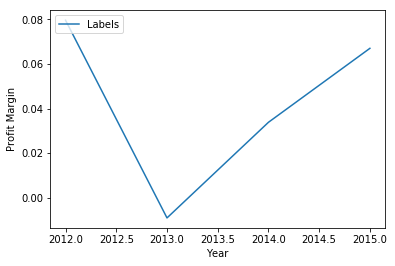

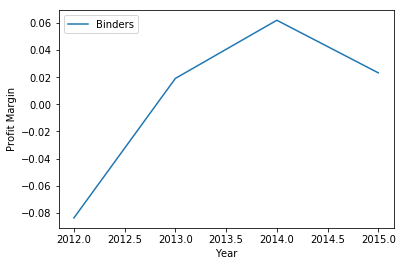

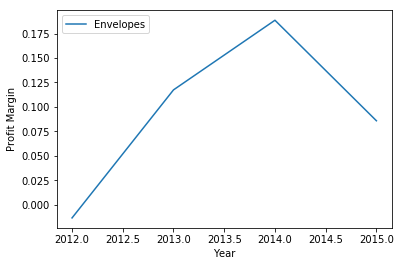

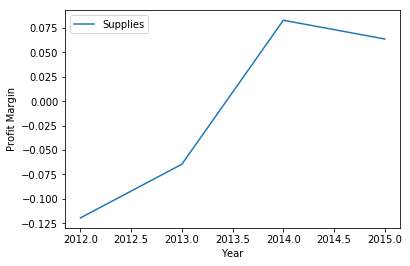

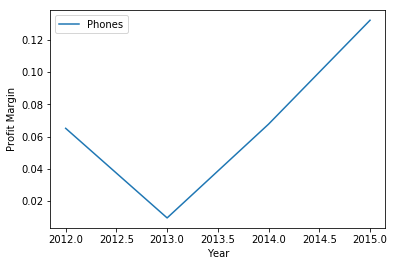

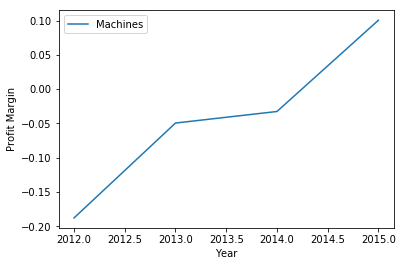

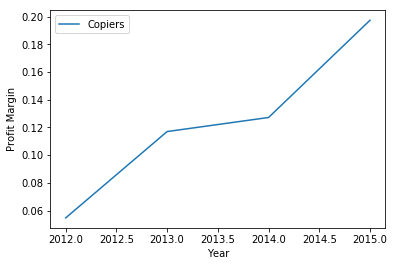

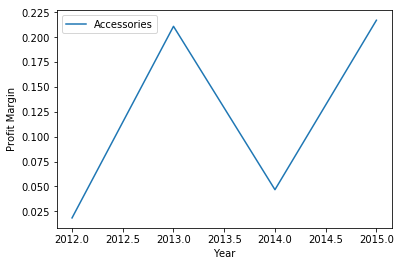

In [20]:
from matplotlib.pylab import plt
%matplotlib inline 

for item in unique_items:
    plt.plot(unique_year, margin_trend[item], label=item)
    plt.xlabel('Year')
    plt.ylabel('Profit Margin')
    plt.legend(loc='upper left')
    plt.show()


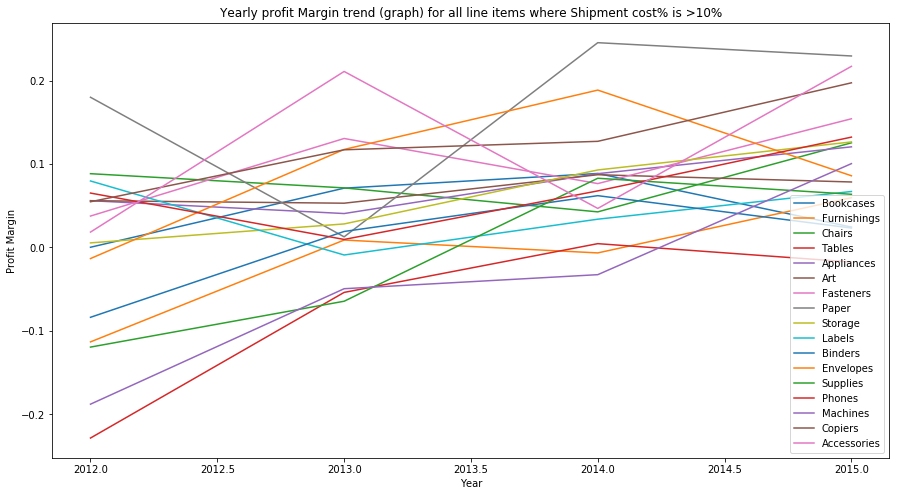

In [35]:
'''
    All plot together for (Shipment cost% is >10%)
'''
from matplotlib.pylab import plt
from matplotlib.pyplot import figure
%matplotlib inline 


plt.figure(figsize=(15,8))
for item in unique_items:
    plt.title('Yearly profit Margin trend (graph) for all line items where Shipment cost% is >10%')
    plt.plot(unique_year, margin_trend[item], label=item)
    plt.xlabel('Year')
    plt.ylabel('Profit Margin')

plt.legend(loc='lower right')
plt.show()

In [36]:
'''
    Individuale graph for Shipment cost% is <=10%
'''
margin_trend = {}
for year in unique_year:
    for item in unique_items:
        temp_data = data[data['Year']==year]
        temp_data = temp_data[temp_data['shipment_cost_per']<=0.10]
        if item in margin_trend:
            margin_trend[item].append(np.mean(temp_data[temp_data['Sub-Category'] ==item]['profit_margin'].values))
        else:
            margin_trend[item] = []
            margin_trend[item].append(np.mean(temp_data[temp_data['Sub-Category'] ==item]['profit_margin'].values))
            

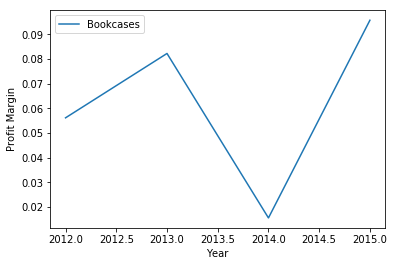

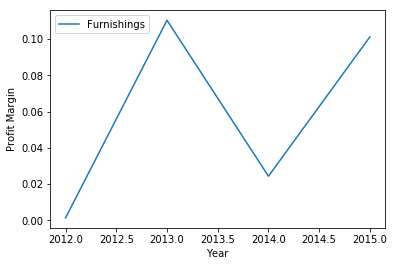

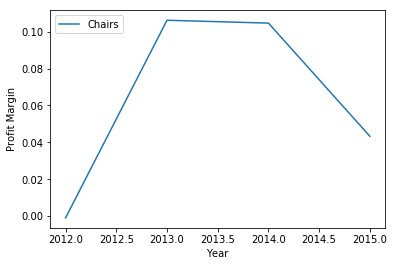

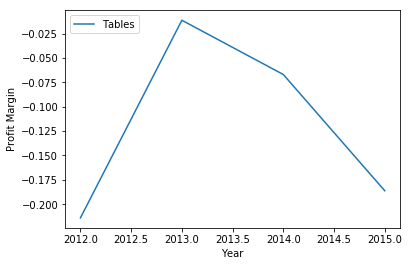

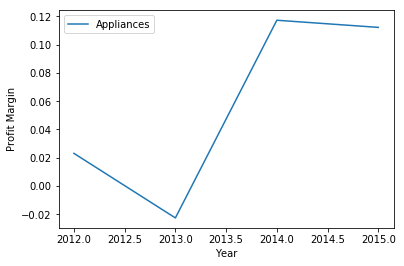

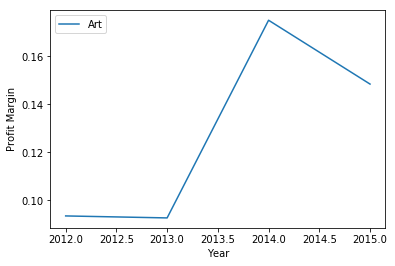

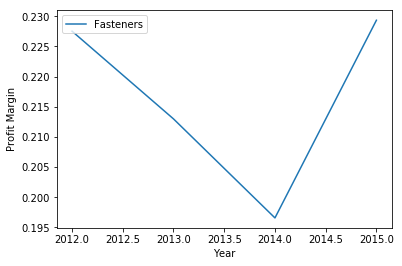

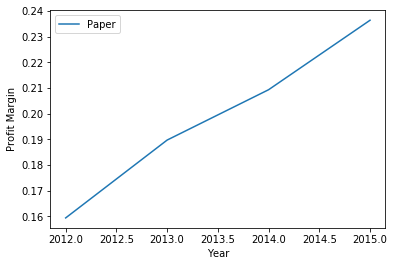

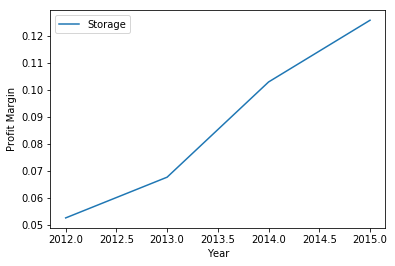

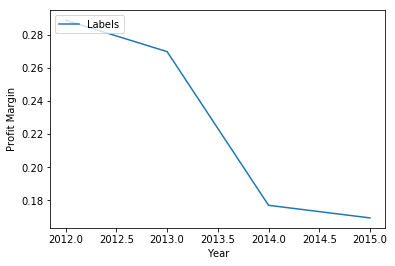

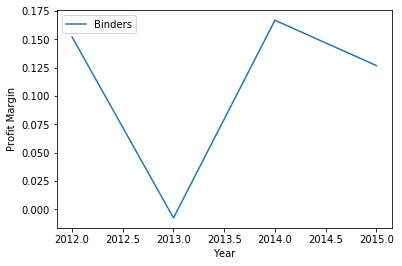

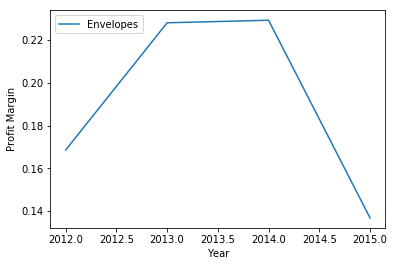

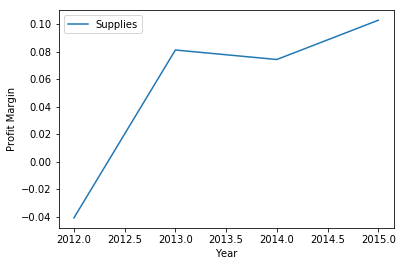

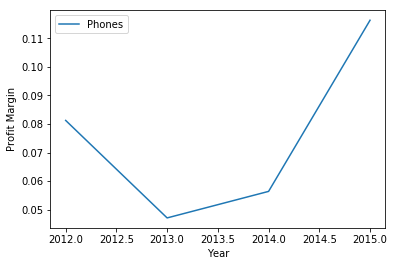

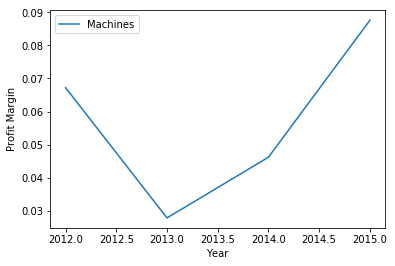

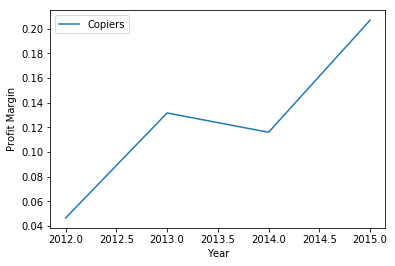

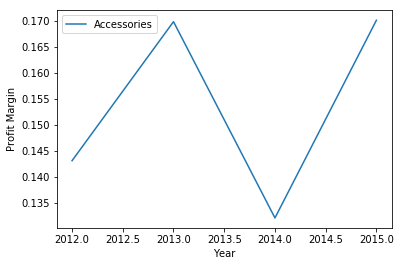

In [39]:
'''
    Individuale graph for Shipment cost% is <=10%
'''
from matplotlib.pylab import plt
%matplotlib inline 

for item in unique_items:
    plt.plot(unique_year, margin_trend[item], label=item)
    plt.xlabel('Year')
    plt.ylabel('Profit Margin')
    plt.legend(loc='upper left')
    plt.show()



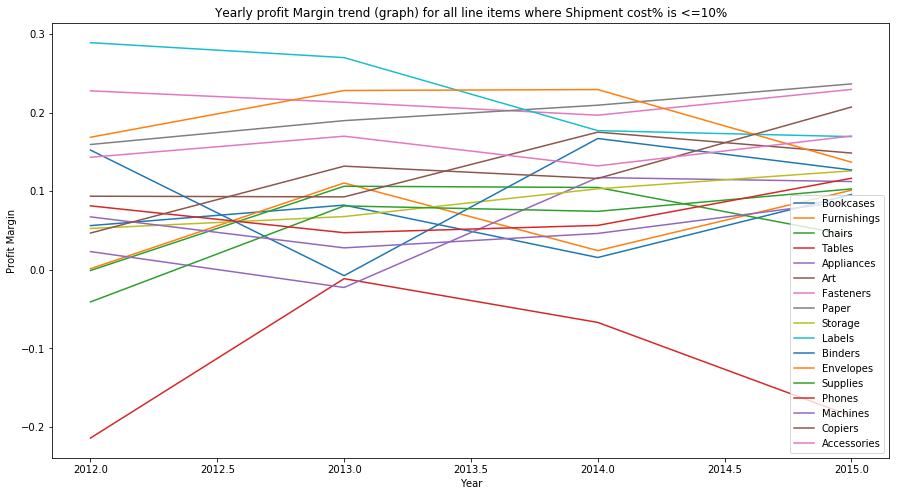

In [40]:
'''
    All plot together for (Shipment cost% is <=10%)
'''
from matplotlib.pylab import plt
from matplotlib.pyplot import figure
%matplotlib inline 


plt.figure(figsize=(15,8))
for item in unique_items:
    plt.title('Yearly profit Margin trend (graph) for all line items where Shipment cost% is <=10%')
    plt.plot(unique_year, margin_trend[item], label=item)
    plt.xlabel('Year')
    plt.ylabel('Profit Margin')

plt.legend(loc='lower right')
plt.show()

In [43]:
'''
    C. Find the following from the original Dataset
        1. Find most Profitable Sub-category Product for each Region for each year
        2. Find highest Shipment cost Sub-category product for each Region for each year
        3. Find most profitable Region for each year
        4. Find most profitable year for the company
        5. Find Busiest Month (Most number of products Shipped) for each sub-category for each year
'''
df = data.groupby(['Region', 'Year'])['Profit'].max().reset_index()
df2 = df.merge(data[['Region', 'Year','Profit','Sub-Category']], how = 'left')

In [44]:
'''
    1. Find most Profitable Sub-category Product for each Region for each year
'''
df2.head()

,Region,Year,Profit,Sub-Category
0,Canada,2012,400.86,Appliances
1,Canada,2013,741.60,Copiers
2,Canada,2014,271.98,Bookcases
3,Canada,2015,1159.02,Phones
4,Caribbean,2012,1073.44,Bookcases


In [45]:
'''
    2. Find highest Shipment cost Sub-category product for each Region for each year
'''
df = data.groupby(['Region', 'Year'])['Shipping Cost'].max().reset_index()
df2 = df.merge(data[['Region', 'Year','Shipping Cost','Sub-Category']], how = 'left')

In [46]:
df2.head()

,Region,Year,Shipping Cost,Sub-Category
0,Canada,2012,164.36,Storage
1,Canada,2013,274.75,Appliances
2,Canada,2014,149.13,Phones
3,Canada,2015,546.56,Phones
4,Caribbean,2012,704.06,Phones


In [47]:
'''
   3. Find most profitable Region for each year 
'''
df = data.groupby(['Region'])['Profit'].max().reset_index()
df2 = df.merge(data[['Region', 'Year','Profit']], how = 'left')

In [48]:
df = df2.sort_values(by=['Year'], ascending=True).groupby(['Year'])['Profit'].max().reset_index()
df2 = df.merge(data[['Region', 'Year','Profit']], how = 'left')

In [49]:
df2

,Year,Profit,Region
0,2012,2939.31,Eastern Asia
1,2013,3177.47,Southern US
2,2014,8399.98,Central US
3,2015,6719.98,Western US


[Text(0, 0.5, 'Profit'), Text(0.5, 0, 'Year')]

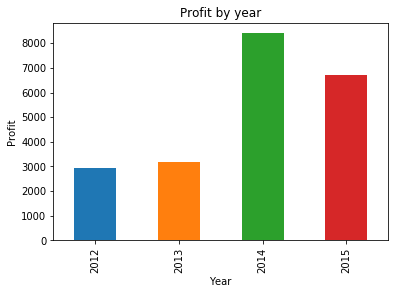

In [50]:
'''
    4. Find most profitable year for the company
'''
df = data.groupby(['Year'])['Profit'].max().reset_index()
df.index = df['Year']
df['Profit'].plot.bar(title='Profit by year').set(xlabel='Year', ylabel='Profit')

In [51]:
'''
    5. Find Busiest Month (Most number of products Shipped) for each sub-category for each year
'''
data['month'] = pd.DatetimeIndex(data['Ship Date']).month

In [52]:
data.head()

,Market,Category,Region,Year,Customer Name,Total sales,Country,City,State,Customer ID,...,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,shipment_cost_per,profit_margin,month
0,Africa,Furniture,Central Africa,2012,Henia Zydlo,2478.60,Angola,Benguela,Benguela,HZ-49504,...,2012-01-13,Standard Class,2478.60,6,0.0,49.50,349.87,0.141156,0.019971,1
1,Africa,Furniture,Central Africa,2012,Ionia McGrath,1958.10,Republic of the Congo,Loubomo,Niari,IM-5055106,...,2012-11-15,Standard Class,1660.80,4,0.0,83.04,244.07,0.146959,0.050000,11
2,Africa,Furniture,Central Africa,2012,Ionia McGrath,1958.10,Republic of the Congo,Loubomo,Niari,IM-5055106,...,2012-11-15,Standard Class,297.30,2,0.0,59.46,24.59,0.082711,0.200000,11
3,Africa,Furniture,Central Africa,2012,Lori Olson,506.04,Cameroon,Yaounde,Centre,LO-717022,...,2013-01-04,Standard Class,506.04,4,0.0,212.52,28.40,0.056122,0.419967,1
4,Africa,Furniture,Central Africa,2012,Clay Ludtke,195.72,Cameroon,Yaounde,Centre,CL-256522,...,2012-06-19,Same Day,195.72,4,0.0,27.36,26.73,0.136573,0.139792,6


In [54]:
df = data.groupby(['Sub-Category', 'Year', 'month'])['Quantity'].sum().reset_index()
df2 = df.groupby(['Sub-Category', 'Year'])['Quantity'].max().reset_index()

In [55]:
df2.merge(df[['Sub-Category', 'Year','Quantity', 'month']], how='left')

,Sub-Category,Year,Quantity,month
0,Accessories,2012,61,12
1,Accessories,2013,78,9
2,Accessories,2014,80,10
3,Accessories,2015,123,8
4,Appliances,2012,107,11
5,Appliances,2013,101,12
6,Appliances,2014,103,6
7,Appliances,2015,134,12
8,Art,2012,91,8
9,Art,2012,91,12
